In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 



In [20]:
df.head(5)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [3]:
df = pd.read_csv("weather_forecast_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [5]:
df.shape

(2500, 6)

In [6]:
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [7]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

C:\Users\PMLS\AppData\Local\Temp\ipykernel_9032\2244493361.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Temperature', y='Rain', data=df, palette='viridis')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_9032\2244493361.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Humidity', y='Rain', data=df, palette='coolwarm')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_9032\2244493361.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Wind_Speed', y='Rain', data=df, palette='Blues')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_9032\2244493361.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Cloud_Cover', y='Rain', data=df, palette='inferno')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_9032\2244493361.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.

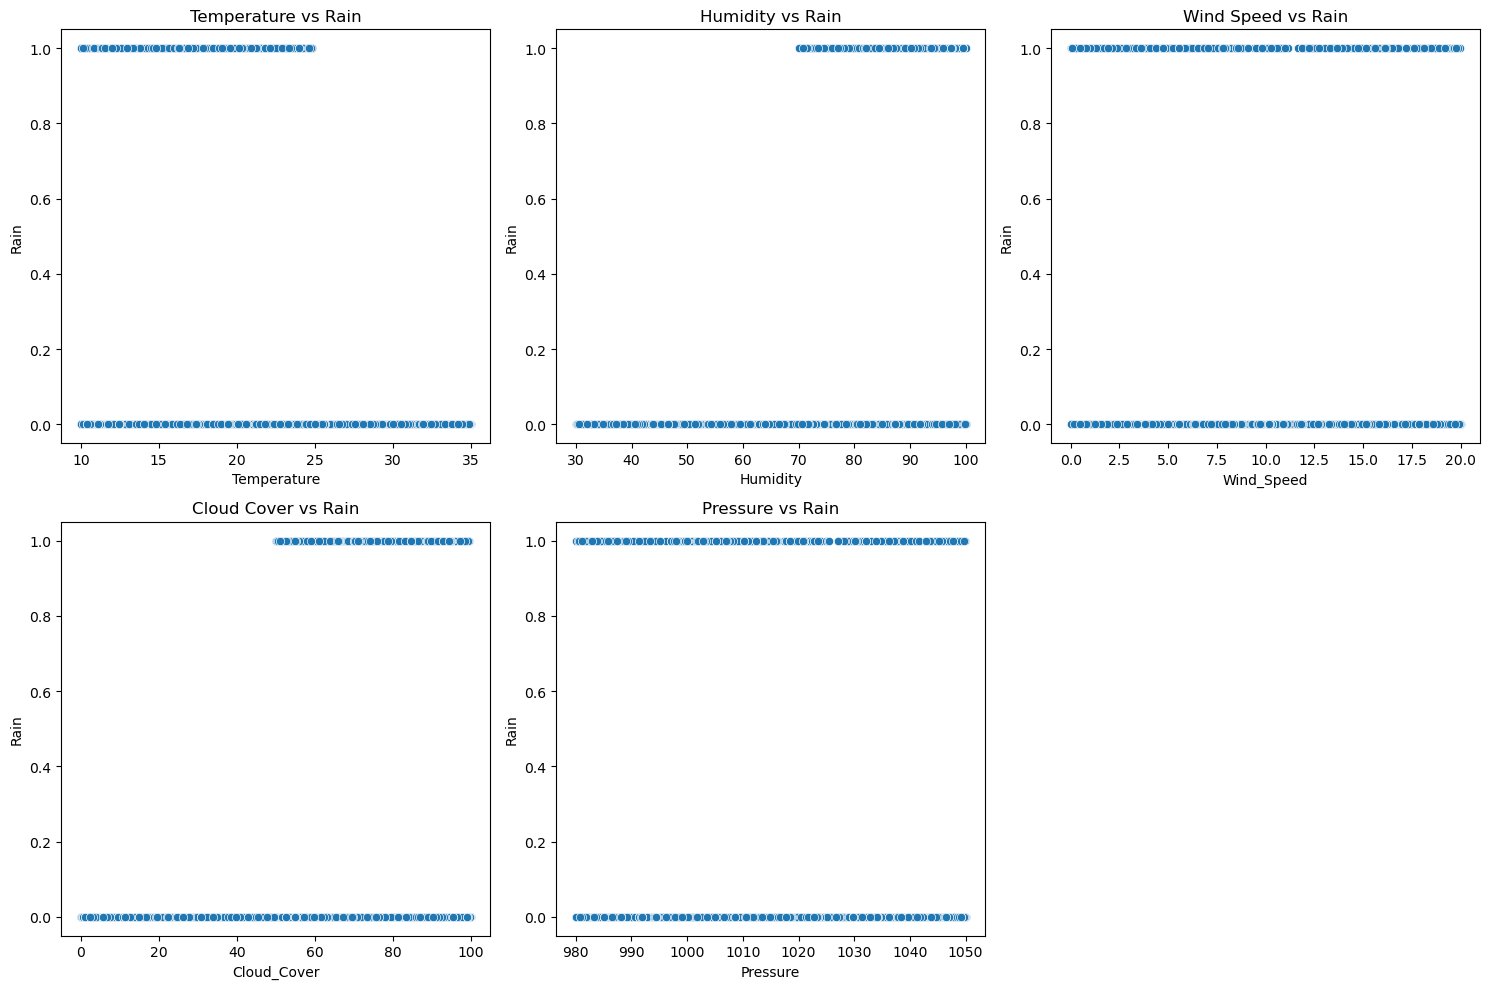

In [23]:
import seaborn as sns
import warnings
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot Temperature vs Rain (1 for rain, 0 for no rain)
plt.subplot(2, 3, 1)
sns.scatterplot(x='Temperature', y='Rain', data=df, palette='viridis')
plt.title('Temperature vs Rain')

# Plot Humidity vs Rain
plt.subplot(2, 3, 2)
sns.scatterplot(x='Humidity', y='Rain', data=df, palette='coolwarm')
plt.title('Humidity vs Rain')

# Plot Wind Speed vs Rain
plt.subplot(2, 3, 3)
sns.scatterplot(x='Wind_Speed', y='Rain', data=df, palette='Blues')
plt.title('Wind Speed vs Rain')

# Plot Cloud Cover vs Rain
plt.subplot(2, 3, 4)
sns.scatterplot(x='Cloud_Cover', y='Rain', data=df, palette='inferno')
plt.title('Cloud Cover vs Rain')

# Plot Pressure vs Rain
plt.subplot(2, 3, 5)
sns.scatterplot(x='Pressure', y='Rain', data=df, palette='magma')
plt.title('Pressure vs Rain')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (Rain) into numeric values
label_encoder = LabelEncoder()
df['Rain'] = label_encoder.fit_transform(df['Rain'])

# Split data into features (X) and target (y)
X = df.drop('Rain', axis=1)  # Features
y = df['Rain']  # Target (rain or no rain)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      0.98      0.99        57

    accuracy                           1.00       500
   macro avg       1.00      0.99      1.00       500
weighted avg       1.00      1.00      1.00       500



In [11]:
# Example of new data for prediction
new_data = pd.DataFrame({
    'Temperature': [25.0],
    'Humidity': [80.0],
    'Wind_Speed': [6.0],
    'Cloud_Cover': [30.0],
    'Pressure': [1010.0]
})

# Predict whether it will rain or not
prediction = rf_clf.predict(new_data)

# Convert prediction back to original labels
rain_status = label_encoder.inverse_transform(prediction)
print(f"Predicted Weather Status: {rain_status[0]}")


Predicted Weather Status: 0


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [13]:
# Initialize the K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

# Display detailed classification report
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.962

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       443
           1       0.84      0.82      0.83        57

    accuracy                           0.96       500
   macro avg       0.91      0.90      0.91       500
weighted avg       0.96      0.96      0.96       500



In [14]:
from sklearn.tree import DecisionTreeClassifier


In [15]:
# Initialize the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

# Display detailed classification report
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00        57

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



KNN Accuracy: 0.962
Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 0.932


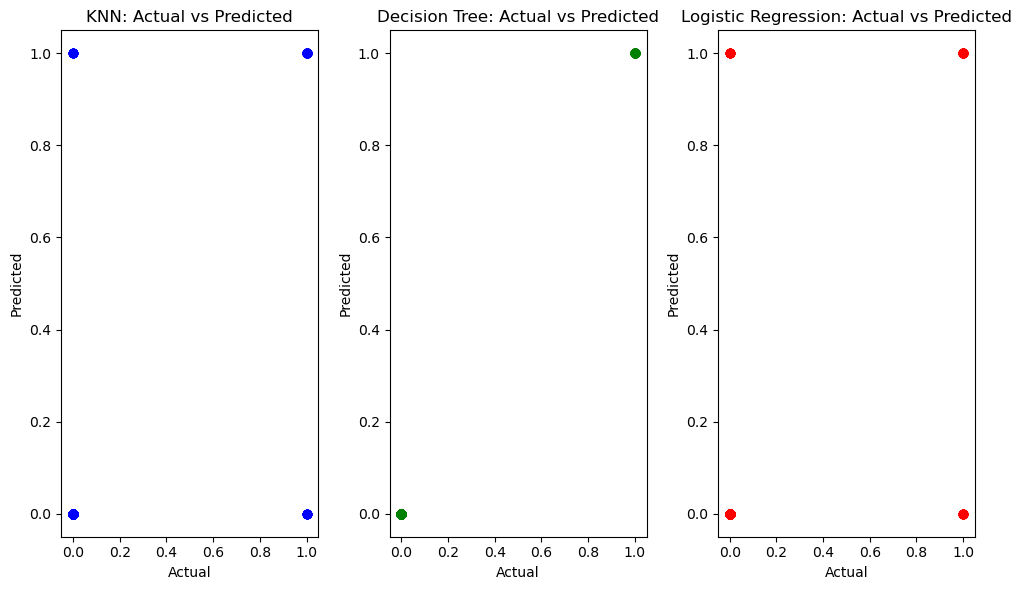

In [19]:
df = pd.read_csv("weather_forecast_data.csv")

# Encode the target variable (Rain) into numeric values
label_encoder = LabelEncoder()
df['Rain'] = label_encoder.fit_transform(df['Rain'])

# Split data into features (X) and target (y)
X = df.drop('Rain', axis=1)  # Features
y = df['Rain']  # Target (rain or no rain)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. K-Nearest Neighbors Model
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

# 2. Decision Tree Model
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

# 3. Logistic Regression Model (Alternative)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)

# Evaluate all models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracies
print(f"KNN Accuracy: {accuracy_knn}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Plotting the results for comparison
plt.figure(figsize=(10, 6))

# Plot the actual vs predicted values for KNN
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.title('KNN: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot the actual vs predicted values for Decision Tree
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.title('Decision Tree: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plot the actual vs predicted values for Logistic Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lr, color='red')
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Show the plot
plt.tight_layout()
plt.show()
